In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel('Master.xlsx')

In [3]:
data.head(3)

,Name of the Company,MMT,PO NO,LOCATION,Invoice No.,Invoice Date,Segment,Sub-Segment,Product Name,Pack Size,...,litres,RATE / LT,Grand total (In Rs.),Net Total (In Rs.),Category,Month,Year,DSR Name,Unnamed: 20,Unnamed: 21
0,VALEO INDIA PVT LTD,NaN,4790000399,VALLAM,H-1302,2018-01-11 00:00:00,Manufacturing,MFG - Plastics,MOBIL DTE 25 DR 208 LTR,208.0,...,1040.0,148.8,154752.0,182607.0,PREMIUM,NOVEMBER,2018,ANANDAKUMAR,NaN,NaN
1,ROTORK CONTROLS INDIA(P) LTD,NaN,AA100929,AMBATTUR,H-1303,2018-02-11 00:00:00,Manufacturing,MFG - M/c Shop,MOBILUBE GX 80W-90 DR 208 LTR,208.0,...,624.0,187.5,117000.0,138060.0,PREMIUM,NOVEMBER,2018,SATHISH,NaN,NaN
2,FREIGHT WINGS PVT LTD,NaN,THROUGH MAIL,NELLORE,H-1304,2018-02-11 00:00:00,Marine,Marine - Shipping,MOBIL DTE 10 EXCEL 46 DR 208 LTR,208.0,...,208.0,223.2,46425.6,57968.0,PREMIUM,NOVEMBER,2018,STAR,NaN,NaN


In [4]:
data.isnull().sum()

Name of the Company           0
MMT                        1145
 PO  NO                       0
LOCATION                      0
Invoice No.                   0
Invoice Date                  0
Segment                     236
Sub-Segment                 264
Product Name                  0
Pack Size                     5
Packaging                     4
Quantity                      3
 litres                       4
RATE / LT                     4
Grand total    (In Rs.)       2
Net Total    (In Rs.)       495
Category                    137
Month                         0
Year                          0
DSR Name                    266
Unnamed: 20                1145
Unnamed: 21                1143
dtype: int64

In [9]:
new_df=data[data['Name of the Company'].str.startswith('RENAULT')]
new_df

,Name of the Company,MMT,PO NO,LOCATION,Invoice No.,Invoice Date,Segment,Sub-Segment,Product Name,Pack Size,...,litres,RATE / LT,Grand total (In Rs.),Net Total (In Rs.),Category,Month,Year,DSR Name,Unnamed: 20,Unnamed: 21
94,RENAULT NISSAN AUTOMOTIVE INDIA PVT LTD,NaN,RNAIPL/OP/2018/MRO/PWT/1368,IRUNGATTUKOTTAI,H-1373,15/11/2018,Manufacturing,MFG - M/c Shop,MOBIL VACTRA OIL NO2 DR 208 LTR,208.0,...,624.0,183.0,114192.0,134747.00,PREMIUM,NOVEMBER,2018,BALAGURU,NaN,NaN
95,RENAULT NISSAN AUTOMOTIVE INDIA PVT LTD,NaN,RNAIPL/OP/2018/MRO/PWT/1368,IRUNGATTUKOTTAI,H-1374,15/11/2018,Manufacturing,MFG - M/c Shop,MOBIL VACTRA OIL NO2 DR 208 LTR,208.0,...,416.0,183.0,76128.0,NaN,PREMIUM,NOVEMBER,2018,BALAGURU,NaN,NaN
96,RENAULT NISSAN AUTOMOTIVE INDIA PVT LTD,NaN,RNAIPL/OP/2018/MRO/PWT/1368,IRUNGATTUKOTTAI,H-1374,15/11/2018,Manufacturing,MFG - M/c Shop,MOBIL DTE 24 DR 208 LTR,208.0,...,208.0,141.6,29452.8,124858.00,PREMIUM,NOVEMBER,2018,BALAGURU,NaN,NaN
139,RENAULT NISSAN AUTOMOTIVE INDIA PVT LTD,NaN,RNAIPL/OP/2018/MRO/PWT-2/1610,ORAGADAM,H-1402,21/11/2018,Manufacturing,MFG - M/c Shop,MOBIL VACUOLINE 1405 DR 208 LTR,208.0,...,416.0,214.0,89024.0,105048.00,NaN,NOVEMBER,2018,BALAGURU,NaN,NaN
158,RENAULT NISSAN AUTOMOTIVE INDIA PVT LTD,NaN,RNAIPL/OP/2017/PT MC/0954,ORAGADAM,H-1416,22/11/2018,Manufacturing,MFG - M/c Shop,MOBILMET 763 DR 208 LTR,208.0,...,416.0,207.1,86153.6,101661.00,PREMIUM,NOVEMBER,2018,BALAGURU,NaN,NaN
168,RENAULT NISSAN AUTOMOTIVE INDIA PVT LTD,NaN,4100106119,ORAGADAM,H-1425,24/11/2018,Manufacturing,MFG - M/c Shop,MOBIL VACTRA OIL NO2 DR 208 LTR,208.0,...,208.0,183.0,38064.0,NaN,PREMIUM,NOVEMBER,2018,BALAGURU,NaN,NaN
169,RENAULT NISSAN AUTOMOTIVE INDIA PVT LTD,NaN,4100106119,ORAGADAM,H-1425,24/11/2018,Manufacturing,MFG - M/c Shop,MOBIL DTE 24 DR 208 LTR,208.0,...,416.0,141.6,58905.6,114424.00,PREMIUM,NOVEMBER,2018,BALAGURU,NaN,NaN
183,RENAULT NISSAN AUTOMOTIVE INDIA PVT LTD,NaN,RNAIPL/OP/2018/MRO/MAINT/PWT/441,ORAGADAM,H-1435,26/11/2018,Manufacturing,MFG - M/c Shop,NUTO H 46 DR 208 LTR,208.0,...,624.0,128.7,80308.8,94764.00,STANDARD,NOVEMBER,2018,BALAGURU,NaN,NaN
235,RENAULT NISSAN AUTOMOTIVE INDIA PVT LTD,NaN,RNAIPL/OP/2018/MRO/PWT/1368,ORAGADAM,H-1478,30/11/2018,Manufacturing,MFG - M/c Shop,MOBIL VACTRA OIL NO2 DR 208 LTR,208.0,...,1040.0,183.0,190320.0,NaN,PREMIUM,NOVEMBER,2018,BALAGURU,NaN,NaN
236,RENAULT NISSAN AUTOMOTIVE INDIA PVT LTD,NaN,RNAIPL/OP/2018/MRO/PWT/1368,ORAGADAM,H-1478,30/11/2018,Manufacturing,MFG - M/c Shop,MOBIL DTE 24 DR 208 LTR,208.0,...,416.0,141.6,58905.6,294086.00,PREMIUM,NOVEMBER,2018,BALAGURU,NaN,NaN


In [10]:
new_df.shape

(56, 22)

In [6]:
data.shape

(1145, 22)

In [7]:
data.drop(['MMT','Unnamed: 20','Unnamed: 21'], axis =1, inplace = True)

In [8]:
data.rename(columns = {'Name of the Company': 'Company', 'PO NO': 'Purchase_order', 'LOCATION':'Location', 
                        'Invoice No.':'invoice_num', 'Invoice Date': 'Invoice_date', 'Segment':'Segment','Sub-Segment':'sub-seg',
                       'Product Name': 'product_name', 'Pack Size': 'pack_size', 'Packaging': 'Packaging','Quantity':'Quantity',
                       0:'new', 'Rate   /LT':'rate/litre', 'Grand total  (In Rs.)': 'Total', 'Category':'Category', 'Month':'month',
                       'Year':'year','Rep_name':'Rep_name'}, inplace = True)

In [9]:
data.sample(10)

,Company,PO NO,Location,invoice_num,Invoice_date,Segment,sub-seg,product_name,pack_size,Packaging,Quantity,,RATE / LT,Grand total (In Rs.),Net Total (In Rs.),Category,month,year,DSR Name
874,INDIA JAPAN LIGHTING PVT LTD,C1PO18/421,THIRUMAZHISAI,H-1953,28/2/2019,Manufacturing,MFG - Plastics,MOBIL DTE 25 DR 208 LTR,208.0,DRUM,2.0,416.0,141.0,58656.0,NaN,PREMIUM,NaN,FEBRUARY,2019
1048,NEWSTAR INJECTORS PRIVATE LIMITED,036/18-19,SRIPERUMBUDUR,H-2082,21/3/2019,Manufacturing,MFG - Plastics,NUTO H 46 DR 208 LTR,208.0,DRUM,2.0,416.0,109.0,45344.0,STANDARD,MARCH,2019,ANANDAKUMAR,NaN
1001,MITSUBA SICAL INDIA PVT LTD,20023927,GUMMIDIPOONDI,H-2042,13/3/2019,Manufacturing,MFG - M/c Shop,MOBIL VACTRA OIL NO 2 DR 208 LTR,208.0,DRUM,1.0,208.0,203.0,42224.0,PREMIUM,MARCH,2019,BALAGURU,NaN
85,VAMSHADHARA PAPER MILLS LTD,1165,GUMMIDIPOONDI,H-1366,15/11/2018,Forestry,Forestry - Paper & Pulp,MOBILGREASE XHP 462 DR 180 KG,180.0,DRUM,1.0,180.0,372.3,67014.0,79077,PREMIUM,NOVEMBER,2018,SATHISH
880,YAMAHA MUSIC INIDA PVT LTD,YMIN_CIIN_18-19_0597,THIRUPOUR,H-1956,2019-01-03 00:00:00,Manufacturing,MFG - M/c Shop,MOBIL DTE 26 PL 20 LTR,20.0,PAIL,1.0,20.0,195.5,3910.0,PREMIUM,MARCH,2019,ANANDAKUMAR,NaN
538,ROCA BATHROOM PRODUCTS PVT LTD,800199280,SRIPERUMBUDUR,H-1695,2019-12-01 00:00:00,Manufacturing,MFG - Plastics,MOBIL DTE 25 DR 208 LTR,208.0,DRUM,2.0,416.0,141.0,58656.0,NaN,PREMIUM,NaN,JANUARY,2019
386,TSUGAMI PRECISION ENGINEERING INDIA PVT LTD,OVER PHONE,AMBATTUR,F-14,21/12/2018,NaN,NaN,MOBILGEAR 600 XP 100 PL 20 LTR,20.0,PAIL,2.0,40.0,0.0,0.0,0,NaN,DECEMBER,2018,BALAGURU
213,JK MEDICAL SYSTEMS PVT LTD,284,KANCHIPURAM,H-1459,29/11/2018,Manufacturing,MFG - Others,MOBILUX EP2 PL 16 KG,16.0,PAIL,1.0,16.0,317.2,5075.2,5989,STANDARD,NOVEMBER,2018,ANANDAKUMAR
914,PMI ENGINEERING EXPORTS PVT LTD,THROUGH MAIL,CHENNAI,H-1983,2019-06-03 00:00:00,Manufacturing,MFG - M/c Shop,MOBIL VACTRA OIL NO 2 DR 208 LTR,208.0,DRUM,1.0,208.0,188.0,39104.0,PREMIUM,MARCH,2019,ANANDAKUMAR,NaN
1077,SWAN ELECTRIC ENGINEERING CO.PVT LTD(UNIT-II),GST/1268/18-19,THIRUMULAVOIL,H-2105,23/3/2019,Manufacturing,MFG - M/c Shop,MOBILITH SHC 007 PL 2 KG,2.0,PAIL,1.0,2.0,2025.0,4050.0,FLAGSHIP,MARCH,2019,SATHISH,NaN


In [10]:
data.rename(columns = {'RATE / LT':'rate/litre', 'Grand total    (In Rs.)':'total','Net Total    (In Rs.)': 'Net_total'}, inplace =True)

In [11]:
data.sample(3)

,Company,PO NO,Location,invoice_num,Invoice_date,Segment,sub-seg,product_name,pack_size,Packaging,Quantity,,rate/litre,total,Net_total,Category,month,year,DSR Name
49,SUNDARAM-CLAYTON LIMITED-ORAGADAM,5210907805,ORAGADAM,H-1341,2018-12-11 00:00:00,Manufacturing,MFG - M/c Shop,MOBIL DTE 26 DR 208 LTR,208.0,DRUM,2.0,416.0,142.0,59072.0,69705,PREMIUM,NOVEMBER,2018,ANANDAKUMAR
148,CALIBER TOOLS,CT/1842018-19,THIRUMUDIVAKKAM,H-1409,22/11/2018,Manufacturing,MFG - Plastics,MOBILUX EP 0 PL 15 KG,15.0,PAIL,1.0,15.0,317.2,4758.0,215220,STANDARD,NOVEMBER,2018,ANANDAKUMAR
589,SAINT GOBAIN INDIA PVT LTD(SEKURIT BUSINESS),4531399643/IC1/2018,SRIPERUMBUDUR,H-1730,21/1/2019,Process,Process - Others,MOBILUX EP023 PL 15 KG,15.0,PAIL,3.0,45.0,448.0,20160.0,23789,STANDARD,STANDARD GRASE,JANUARY,2019


Company           0
 PO  NO           0
Location          0
invoice_num       0
Invoice_date      0
Segment         236
sub-seg         264
product_name      0
pack_size         5
Packaging         4
Quantity          3
                  4
rate/litre        4
total             2
Net_total       230
Category        136
month           308
year              0
DSR Name        266
dtype: int64

In [37]:
data['Segment'].fillna('U', inplace = True)
data['sub-seg'].fillna('U', inplace = True)
data['Category'].fillna('U', inplace = True)
data['month'].fillna('U', inplace = True)
data['DSR Name'].fillna('U', inplace = True)

In [38]:
data.drop('Net_total', axis =1, inplace = True)

KeyError: "['Net_total'] not found in axis"

In [39]:
data.dropna(inplace = True)

In [40]:
data.isnull().sum()

Company         0
 PO  NO         0
Location        0
invoice_num     0
Invoice_date    0
Segment         0
sub-seg         0
product_name    0
pack_size       0
Packaging       0
Quantity        0
                0
rate/litre      0
total           0
Category        0
month           0
year            0
DSR Name        0
dtype: int64

In [41]:
#to find unique values in each column
def unique_counts(df1):
   for i in data.columns:
       count = data[i].nunique()
       print(i, ": ", count)
unique_counts(data)

Company :  368
 PO  NO :  597
Location :  112
invoice_num :  840
Invoice_date :  120
Segment :  9
sub-seg :  15
product_name :  170
pack_size :  15
Packaging :  6
Quantity :  23
  :  65
rate/litre :  403
total :  663
Category :  6
month :  8
year :  10
DSR Name :  8


In [42]:
data.Quantity.max()

41.0

In [43]:
data['Company'] = data['Company'].str.strip() #remove the whitespace in the description column
data.dropna(axis =0, subset=['invoice_num'], inplace=True) #remove the records which has no invoice

data['invoice_num'] = data['invoice_num'].astype('str')
#lube = lube[~lube['invoice_num'].str.contains('H')] # C for cancelled, removes list of invoices having C

In [101]:
data.head()

,Company,PO NO,Location,invoice_num,Invoice_date,Segment,sub-seg,product_name,pack_size,Packaging,Quantity,,rate/litre,total,Category,month,year,DSR Name
0,YAMAHA MUSIC INIDA PVT LTD,YMIN_CIIN_18-19_0597,THIRUPOUR,H-1956,2019-01-03 00:00:00,Manufacturing,MFG - M/c Shop,MOBIL DTE OIL LIGHT DR 208 LTR,208.0,DRUM,1.0,208.0,189.2,39353.6,PREMIUM,MARCH,2019,ANANDAKUMAR
1,YAMAHA MUSIC INIDA PVT LTD,YMIN_CIIN_18-19_0597,THIRUPOUR,H-1956,2019-01-03 00:00:00,Manufacturing,MFG - M/c Shop,MOBIL DTE 26 PL 20 LTR,20.0,PAIL,1.0,20.0,195.5,3910.0,PREMIUM,MARCH,2019,ANANDAKUMAR
2,YAMAHA MUSIC INIDA PVT LTD,YMIN_CIIN_18-19_0597,THIRUPOUR,H-1956,2019-01-03 00:00:00,Manufacturing,MFG - M/c Shop,MOBIL VELOCITE OIL NO 6 PL 20 LTR,20.0,PAIL,1.0,20.0,251.7,5034.0,PREMIUM,MARCH,2019,ANANDAKUMAR
3,YAMAHA MUSIC INIDA PVT LTD,YMIN_CIIN_18-19_0597,THIRUPOUR,H-1956,2019-01-03 00:00:00,Manufacturing,MFG - M/c Shop,MOBIL VELOCITE OIL NO 10 PL 20 LTR,20.0,PAIL,1.0,20.0,251.7,5034.0,PREMIUM,MARCH,2019,ANANDAKUMAR
4,SAI ENGINEERING,OVER PHONE,ATHIPET,H-1957,2019-01-03 00:00:00,Manufacturing,MFG - M/c Shop,MOBILITH SHC 077 PL 2 KG,2.0,PAIL,2.0,4.0,2025.0,8100.0,FLAGSHIP,MARCH,2019,STAR


In [102]:
type(data.invoice_num)

pandas.core.series.Series

In [103]:
grouped = data.groupby(['invoice_num','product_name']).size().reset_index(name = 'count')
df = grouped.sort_values('invoice_num', ascending = False)

df.head(5)

,invoice_num,product_name,count
263,H2010,MOBILITH SHC 007 PL 2 KG,1
262,H-2156,NUTO H 68 DR 208 LTR,1
261,H-2155,MOBIL VACTRA OIL NO 2 DR 208 LTR,1
260,H-2155,MOBIL DTE 25 DR 208 LTR,1
259,H-2154,MOBIL DTE 25 DR 208 LTR,1


In [104]:
#to group according to items and thier total transactions
basket = (df.groupby(['invoice_num','product_name'])['count'].sum().unstack().reset_index().fillna(0).set_index('invoice_num'))

def encode_units(x):
    if x<=0:
        return 0
    if x>= 1:
        return 1
    
    

basket_sets = basket.applymap(encode_units)

In [105]:
basket_sets.head(10)

product_name,MOBIL ATF 22 PL 20 LTR,MOBIL ATF 220 PL 20 LTR,MOBIL DELVAC MX 15W-40 DR 208 LTR,MOBIL DTE 10 EXCEL 32 DR 208 LTR,MOBIL DTE 10 EXCEL 46 DR 208 LTR,MOBIL DTE 24 DR 208 LTR,MOBIL DTE 24 PL 20 LTR,MOBIL DTE 25 DR 208 LTR,MOBIL DTE 25 PL 20 LTR,MOBIL DTE 26 DR 208 LTR,...,NUTO H 32 DR 208 LTR,NUTO H 46 DR 208 LTR,NUTO H 46 PL 20 LTR,NUTO H 68 DR 208 LTR,NUTO H 68 PL 20 LTR,NUTO H 68 PL 50 LTR,SPARTAN EP 150 DR 208 LTR,SPARTAN EP 220 DR 208 LTR,UNIREX N2 PL 18 KG,UNIREX N3 PL 18 KG
invoice_num,,,,,,,,,,,,,,,,,,,,,
H-1956,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
H-1957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
H-1958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
H-1959,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
H-1960,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
H-1961,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
H-1962,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
H-1963,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
H-1964,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
frequent_itemsets = apriori(basket_sets,min_support=0.01, use_colnames=True)
frequent_itemsets.head(5)

,support,itemsets
0,0.015075,(MOBIL DTE 10 EXCEL 46 DR 208 LTR)
1,0.045226,(MOBIL DTE 24 DR 208 LTR)
2,0.035176,(MOBIL DTE 24 PL 20 LTR)
3,0.095477,(MOBIL DTE 25 DR 208 LTR)
4,0.055276,(MOBIL DTE 26 DR 208 LTR)


In [107]:
rules = association_rules(frequent_itemsets,metric  ='lift')
rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(MOBIL DTE 24 DR 208 LTR),(MOBIL VACTRA OIL NO 2 DR 208 LTR),0.045226,0.075377,0.015075,0.333333,4.422222,0.011666,1.386935
1,(MOBIL VACTRA OIL NO 2 DR 208 LTR),(MOBIL DTE 24 DR 208 LTR),0.075377,0.045226,0.015075,0.200000,4.422222,0.011666,1.193467
2,(MOBIL VELOCITE OIL NO 6 DR 208 LTR),(MOBIL DTE 24 DR 208 LTR),0.020101,0.045226,0.010050,0.500000,11.055556,0.009141,1.909548
3,(MOBIL DTE 24 DR 208 LTR),(MOBIL VELOCITE OIL NO 6 DR 208 LTR),0.045226,0.020101,0.010050,0.222222,11.055556,0.009141,1.259871
4,(MOBIL DTE 25 DR 208 LTR),(MOBIL DTE 26 DR 208 LTR),0.095477,0.055276,0.010050,0.105263,1.904306,0.004773,1.055868


In [141]:
rules[ (rules['lift']>=1.0) & 
         (rules['confidence'] >=0.2)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(MOBIL DTE 24 DR 208 LTR),(MOBIL VACTRA OIL NO 2 DR 208 LTR),0.045226,0.075377,0.015075,0.333333,4.422222,0.011666,1.386935
1,(MOBIL VACTRA OIL NO 2 DR 208 LTR),(MOBIL DTE 24 DR 208 LTR),0.075377,0.045226,0.015075,0.200000,4.422222,0.011666,1.193467
2,(MOBIL VELOCITE OIL NO 6 DR 208 LTR),(MOBIL DTE 24 DR 208 LTR),0.020101,0.045226,0.010050,0.500000,11.055556,0.009141,1.909548
3,(MOBIL DTE 24 DR 208 LTR),(MOBIL VELOCITE OIL NO 6 DR 208 LTR),0.045226,0.020101,0.010050,0.222222,11.055556,0.009141,1.259871
8,(MOBIL DTE 26 PL 20 LTR),(MOBIL VACTRA OIL NO 2 PL 20 LTR),0.020101,0.055276,0.010050,0.500000,9.045455,0.008939,1.889447
10,(MOBIL VELOCITE NO 3 PL 20 LTR),(MOBIL VACTRA OIL NO 2 PL 20 LTR),0.035176,0.055276,0.010050,0.285714,5.168831,0.008106,1.322613
12,(MOBIL VELOCITE OIL NO 10 PL 20 LTR),(MOBIL VACTRA OIL NO 2 PL 20 LTR),0.015075,0.055276,0.010050,0.666667,12.060606,0.009217,2.834171
14,(MOBIL VELOCITE OIL NO 3 DR 208 LTR),(MOBILGEAR 600 XP 100 DR 208 LTR),0.040201,0.015075,0.010050,0.250000,16.583333,0.009444,1.313233
15,(MOBILGEAR 600 XP 100 DR 208 LTR),(MOBIL VELOCITE OIL NO 3 DR 208 LTR),0.015075,0.040201,0.010050,0.666667,16.583333,0.009444,2.879397
16,(MOBILUX EP 2 PL 16 KG),(MOBILUX EP 0 PL 15 KG),0.040201,0.025126,0.010050,0.250000,9.950000,0.009040,1.299832


In [72]:
data.head()

,Company,PO NO,Location,invoice_num,Invoice_date,Segment,sub-seg,product_name,pack_size,Packaging,Quantity,,rate/litre,total,Category,month,year,DSR Name
0,YAMAHA MUSIC INIDA PVT LTD,YMIN_CIIN_18-19_0597,THIRUPOUR,H-1956,2019-01-03 00:00:00,Manufacturing,MFG - M/c Shop,MOBIL DTE OIL LIGHT DR 208 LTR,208.0,DRUM,1.0,208.0,189.2,39353.6,PREMIUM,MARCH,2019,ANANDAKUMAR
1,YAMAHA MUSIC INIDA PVT LTD,YMIN_CIIN_18-19_0597,THIRUPOUR,H-1956,2019-01-03 00:00:00,Manufacturing,MFG - M/c Shop,MOBIL DTE 26 PL 20 LTR,20.0,PAIL,1.0,20.0,195.5,3910.0,PREMIUM,MARCH,2019,ANANDAKUMAR
2,YAMAHA MUSIC INIDA PVT LTD,YMIN_CIIN_18-19_0597,THIRUPOUR,H-1956,2019-01-03 00:00:00,Manufacturing,MFG - M/c Shop,MOBIL VELOCITE OIL NO 6 PL 20 LTR,20.0,PAIL,1.0,20.0,251.7,5034.0,PREMIUM,MARCH,2019,ANANDAKUMAR
3,YAMAHA MUSIC INIDA PVT LTD,YMIN_CIIN_18-19_0597,THIRUPOUR,H-1956,2019-01-03 00:00:00,Manufacturing,MFG - M/c Shop,MOBIL VELOCITE OIL NO 10 PL 20 LTR,20.0,PAIL,1.0,20.0,251.7,5034.0,PREMIUM,MARCH,2019,ANANDAKUMAR
4,SAI ENGINEERING,OVER PHONE,ATHIPET,H-1957,2019-01-03 00:00:00,Manufacturing,MFG - M/c Shop,MOBILITH SHC 077 PL 2 KG,2.0,PAIL,2.0,4.0,2025.0,8100.0,FLAGSHIP,MARCH,2019,STAR


In [76]:
data['Company'].nunique()

132

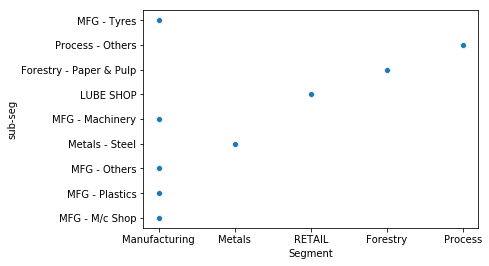

In [79]:
sns.scatterplot(x = 'Segment', y = 'sub-seg', data = data)

<BarContainer object of 264 artists>

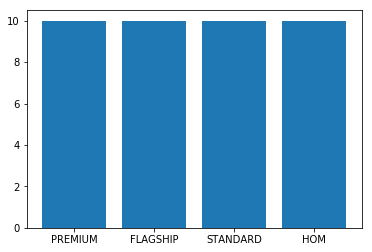

In [91]:
plt.bar(x = 'Category',height=10, data = data)

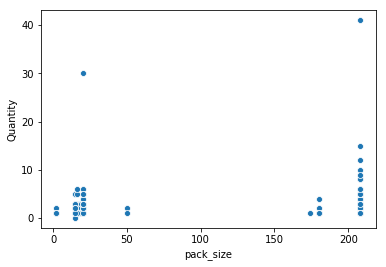

In [92]:
sns.scatterplot(x = 'pack_size', y= 'Quantity', data = data)
plt.show()